In [100]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm

In [3]:
cars_data = pd.read_csv('module_5_auto.csv')
cars_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
cars_data

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,9.5,114.0,5400.0,23,28,16845.0,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,8.7,160.0,5300.0,19,25,19045.0,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,8.8,134.0,5500.0,18,23,21485.0,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,23.0,106.0,4800.0,26,27,22470.0,9.038462,Medium,1,0


In [74]:
#   Functions for Plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend(loc='best')
    plt.show()
    plt.close()
    
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 

    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()
    
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, target_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [25]:
#   Part 1: Training and Testing
#   Il faut diviser notre dataset en Training et Testing
target_data = cars_data["price"]
x_data = cars_data.drop(['price'], axis=1).reset_index(drop=True)
# on va utiliser cette function pour fair ça
x_train, x_test, y_train, y_test = train_test_split(x_data, target_data, test_size=0.10, random_state=1)


RangeIndex(start=0, stop=201, step=1)

In [29]:
# Linear Regression Model Creation
lre = LinearRegression()
lre.fit(x_train[['horsepower']], y_train)
print("test score: ", lre.score(x_test[['horsepower']], y_test))
print("Training score: ", lre.score(x_train[['horsepower']], y_train))

test score:  0.3635875575078824
Training score:  0.6619724197515103


In [30]:
#   R^2 on the test data using 40% of the dataset for testing.
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, target_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
print("test score: ", lre.score(x_test1[['horsepower']], y_test1))
print("Training score: ", lre.score(x_train1[['horsepower']], y_train1))

test score:  0.7139364665406973
Training score:  0.5754067463583004


## Cross-Validation Score



In [36]:
Rcross = cross_val_score(lre, x_data[['horsepower']], target_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
print("Rcross = ", Rcross)

The mean of the folds are 0.5220099150421194 and the standard deviation is 0.2911839444756025
Rcross =  [0.7746232  0.51716687 0.74785353 0.04839605]


In [37]:
# Using 2 folds
Rcross = cross_val_score(lre, x_data[['horsepower']], target_data, cv=2)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
print("Rcross = ", Rcross)

The mean of the folds are 0.5166761697127429 and the standard deviation is 0.07348004195771385
Rcross =  [0.59015621 0.44319613]


In [39]:
yhat = cross_val_predict(lre,x_data[['horsepower']], target_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Part 2: Overfitting, Underfitting and Model Selection


In [50]:
#   Prediction using training data
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [51]:
#   Prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

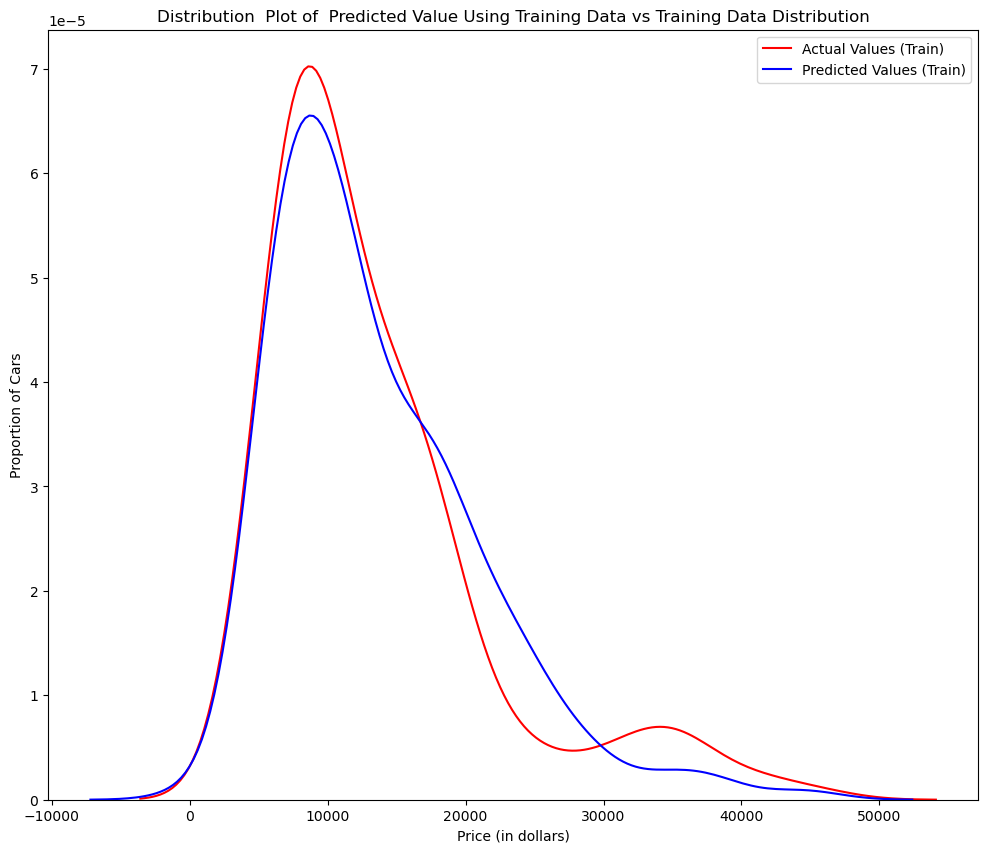

In [47]:
# Visualisation de la distribution des valeurs predits
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

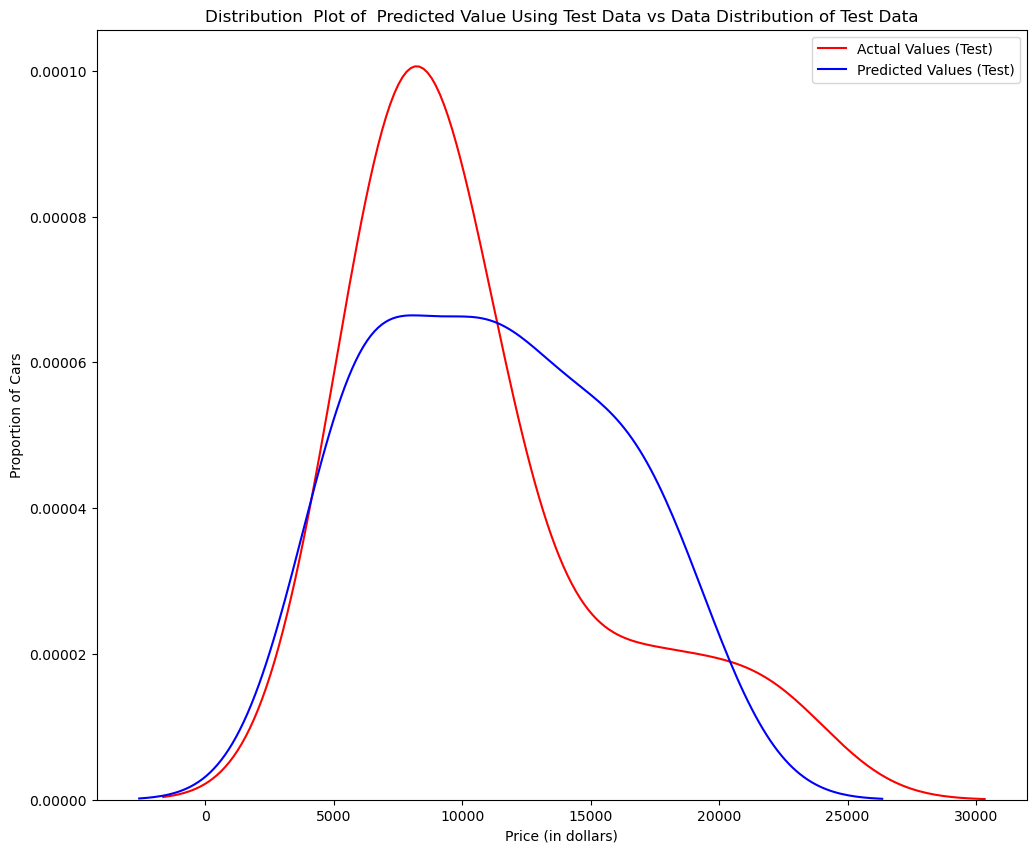

In [52]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

## Overfitting
c'est un problème en machine learning où un modèle apprend trop bien les détails et le bruit des données d'entraînement, Résultat : il fonctionne très bien sur les données d’entraînement, mais se généralise mal aux nouvelles données (test ou validation).

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_data, target_data, test_size=0.45, random_state=0)    # on va diviser notre dataset sur 45% pour le test
pr = PolynomialFeatures(degree=5)   # permet de capturer des relations non linéaires entre les variables indépendantes
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [58]:
poly_lr = LinearRegression()
poly_lr.fit(x_train_pr, y_train)

LinearRegression()

In [62]:
yhat = poly_lr.predict(x_test_pr)
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.77492727  7308.09738048 12213.83912148 18893.06269972]
True values: [ 6295. 10698. 13860. 13499.]


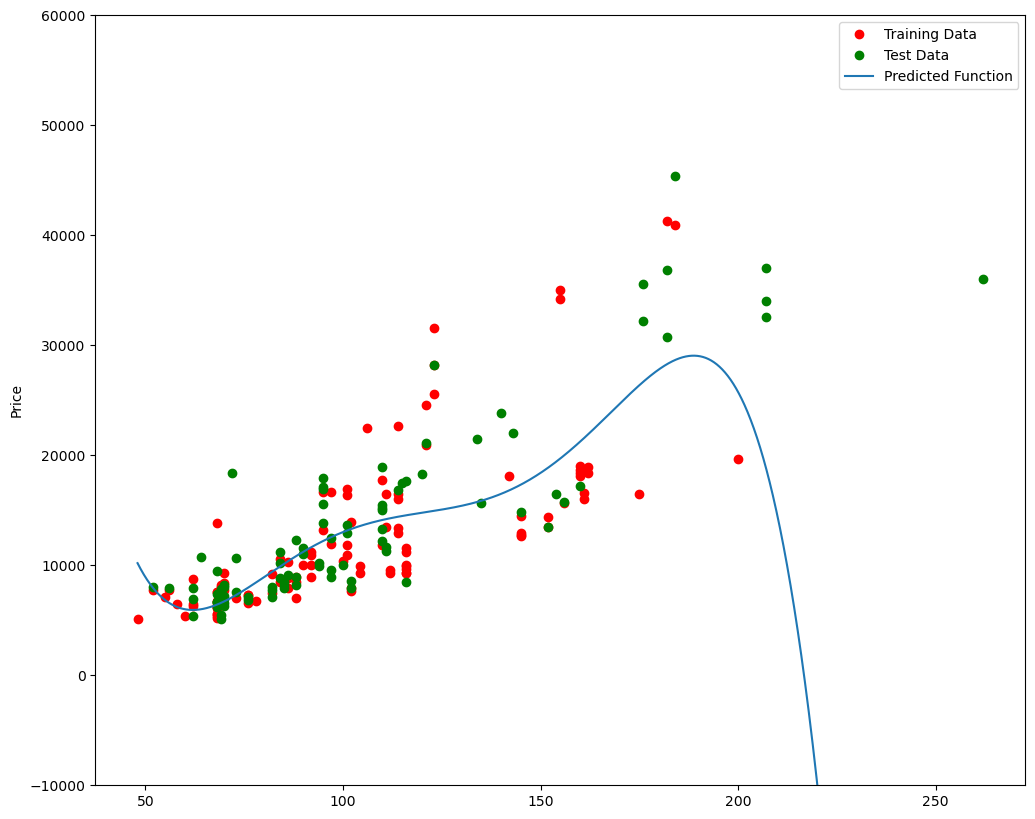

In [64]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly_lr,pr)

In [67]:
print("R^2 of the training data : ", poly_lr.score(x_train_pr, y_train))
print("R^2 of the test data : ", poly_lr.score(x_test_pr, y_test))

R^2 of the training data :  0.5567716899817778
R^2 of the test data :  -29.871838229908324


####   We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

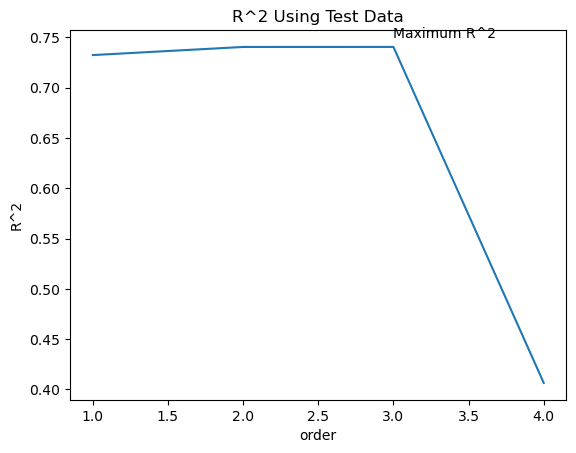

In [70]:
#   Let's see how the R^2 changes on the test data for different order polynomials
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

In [75]:
from ipywidgets import interact

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [81]:
pr1 = PolynomialFeatures(degree=2)
x_train_pr_1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr_1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_train_pr_1.shape

(110, 15)

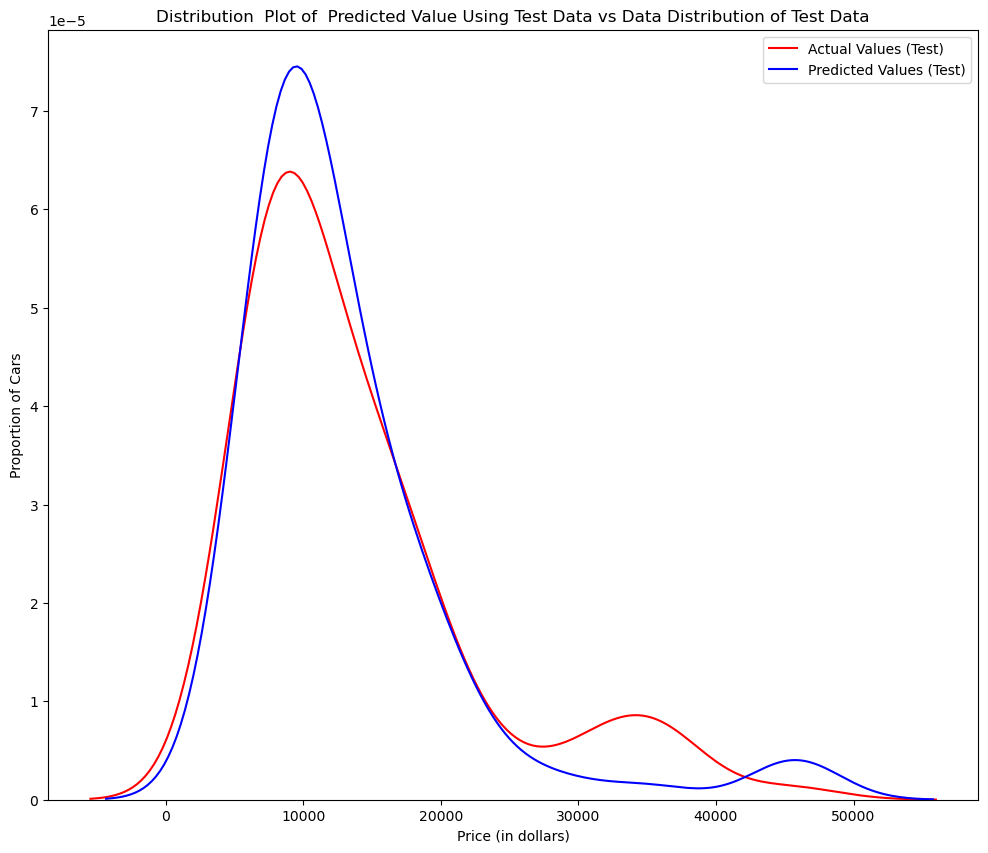

In [87]:
pr1 = LinearRegression()
pr1.fit(x_train_pr_1, y_train)
yhat = pr1.predict(x_test_pr_1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat, "Actual Values (Test)", "Predicted Values (Test)", Title)

#   Part 3: Ridge Regression
ajoute une pénalité pour réduire le surajustement (overfitting)

In [90]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [92]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [94]:
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313255]
test set : [ 6295. 10698. 13860. 13499.]


In [97]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:11<00:00, 85.05it/s, Test Score=0.564, Train Score=0.859]


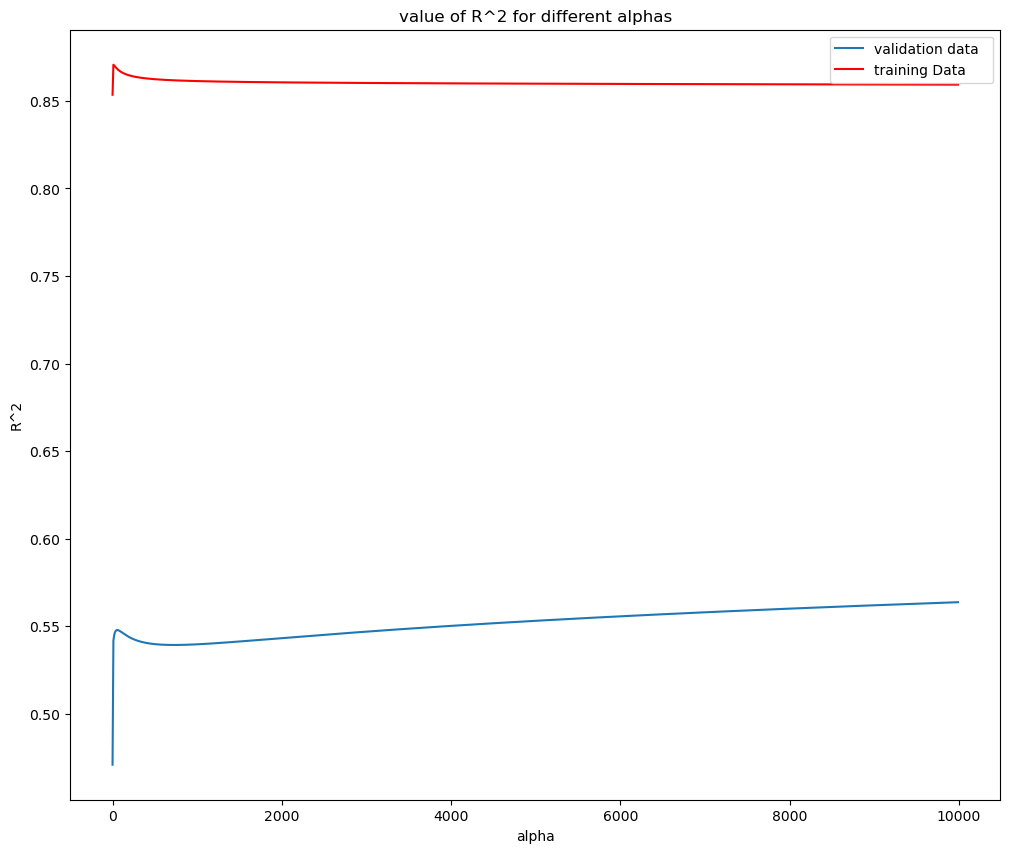

In [99]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.title("value of R^2 for different alphas")
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

#   Part 4: Grid Search

In [101]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], target_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [104]:
BestRR=Grid1.best_estimator_
print(BestRR)
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

Ridge(alpha=10000)


0.8411649831036149